<a href="https://colab.research.google.com/github/emredeveloper/Data-Preprocessing/blob/master/Customer_Segmantation_%2B_HDBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from hdbscan import HDBSCAN
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

In [16]:
data = pd.read_csv('/content/marketing_campaign.csv',sep='\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [17]:
data.shape

(2240, 29)

In [18]:
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 2216


In [22]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format='%d-%m-%Y')
data["Dt_Customer"]

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2216, dtype: datetime64[ns]

In [23]:
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [26]:
data["Age"] = 2024-data["Year_Birth"]
data["Age"].mean()

55.17960288808664

In [27]:
data["Children"]=data["Kidhome"]+data["Teenhome"]

In [29]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Children'],
      dtype='object')

In [30]:
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

In [31]:
#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

In [33]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

['Education']

In [35]:
from sklearn.preprocessing import LabelEncoder


In [36]:
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

In [38]:
data.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,Is_Parent
0,2,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,0,0,0,1,67,0,0
1,2,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,0,0,0,70,2,1
2,2,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,0,0,0,59,0,0
3,2,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,0,0,0,40,1,1
4,4,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,0,0,0,43,1,1


In [40]:
data.drop(["Kidhome", "Teenhome"], axis=1)

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,Is_Parent
0,2,58138.0,58,635,88,546,172,88,88,3,...,0,0,0,0,0,0,1,67,0,0
1,2,46344.0,38,11,1,6,2,1,6,2,...,0,0,0,0,0,0,0,70,2,1
2,2,71613.0,26,426,49,127,111,21,42,1,...,0,0,0,0,0,0,0,59,0,0
3,2,26646.0,26,11,4,20,10,3,5,2,...,0,0,0,0,0,0,0,40,1,1
4,4,58293.0,94,173,43,118,46,27,15,5,...,0,0,0,0,0,0,0,43,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,61223.0,46,709,43,182,42,118,247,2,...,0,0,0,0,0,0,0,57,1,1
2236,4,64014.0,56,406,0,30,0,0,8,7,...,0,0,0,1,0,0,0,78,3,1
2237,2,56981.0,91,908,48,217,32,12,24,1,...,0,1,0,0,0,0,0,43,0,0
2238,3,69245.0,8,428,30,214,80,30,61,2,...,0,0,0,0,0,0,0,68,1,1


In [41]:
from sklearn.preprocessing import LabelEncoder, StandardScaler # Import StandardScaler


In [42]:
#Creating a copy of data
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )

In [43]:
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Children,Is_Parent
0,-0.350527,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,0.986443,-1.264803,-1.581389
1,-0.350527,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,1.236801,1.405806,0.632356
2,-0.350527,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,0.318822,-1.264803,-1.581389
3,-0.350527,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,-1.266777,0.070501,0.632356
4,1.429011,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,-1.016420,0.070501,0.632356


In [45]:
from sklearn.decomposition import PCA

In [47]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.head()

,col1,col2,col3
0,4.303616,-0.141380,1.190900
1,-2.703173,0.330921,-0.804365
2,2.539229,-0.787720,-0.210932
3,-2.375730,-1.592317,0.666604
4,-0.445894,0.259080,0.564700


In [49]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

Elbow Method to determine the number of clusters to be formed:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

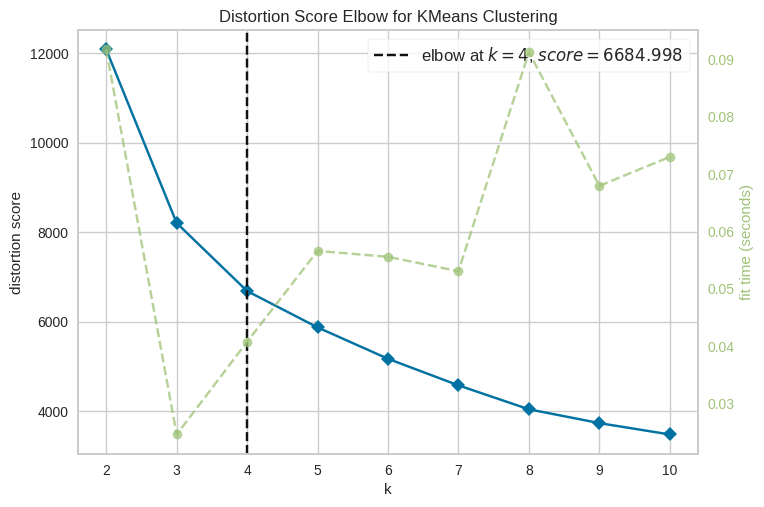

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [50]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [52]:
#Initiating the Agglomerative Clustering model
from sklearn.cluster import AgglomerativeClustering # Import the class
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

       col1      col2      col3  Clusters
0  4.303616 -0.141380  1.190900         2
1 -2.703173  0.330921 -0.804365         3
2  2.539229 -0.787720 -0.210932         2
3 -2.375730 -1.592317  0.666604         1
4 -0.445894  0.259080  0.564700         0


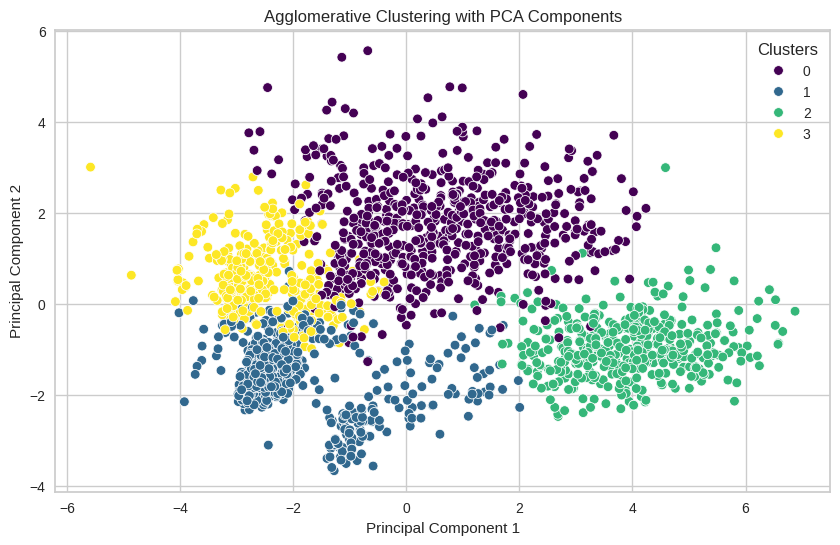

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Veri setini gözden geçirme
print(PCA_ds.head())

# PCA bileşenlerini kullanarak görselleştirme için bir scatter plot oluşturma
plt.figure(figsize=(10, 6))
sns.scatterplot(x='col1', y='col2', hue='Clusters', data=PCA_ds, palette='viridis', legend='full')
plt.title('Agglomerative Clustering with PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Clusters', loc='upper right')
plt.show()


In [58]:
import hdbscan  # Make sure you import the module

# HDBSCAN modelini tanımlama ve uygulama
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=5)
yhat_hdbscan = hdbscan_model.fit_predict(PCA_ds)
PCA_ds["Clusters2"] = yhat_hdbscan

In [62]:
PCA_ds[PCA_ds["Clusters2"] == -1].count()

col1         111
col2         111
col3         111
Clusters     111
Clusters2    111
dtype: int64

In [63]:
# -1 etiketli noktaları filtreleme
filtered_data = PCA_ds[PCA_ds['Clusters2'] != -1]

In [65]:
filtered_data.shape

(2105, 5)